In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


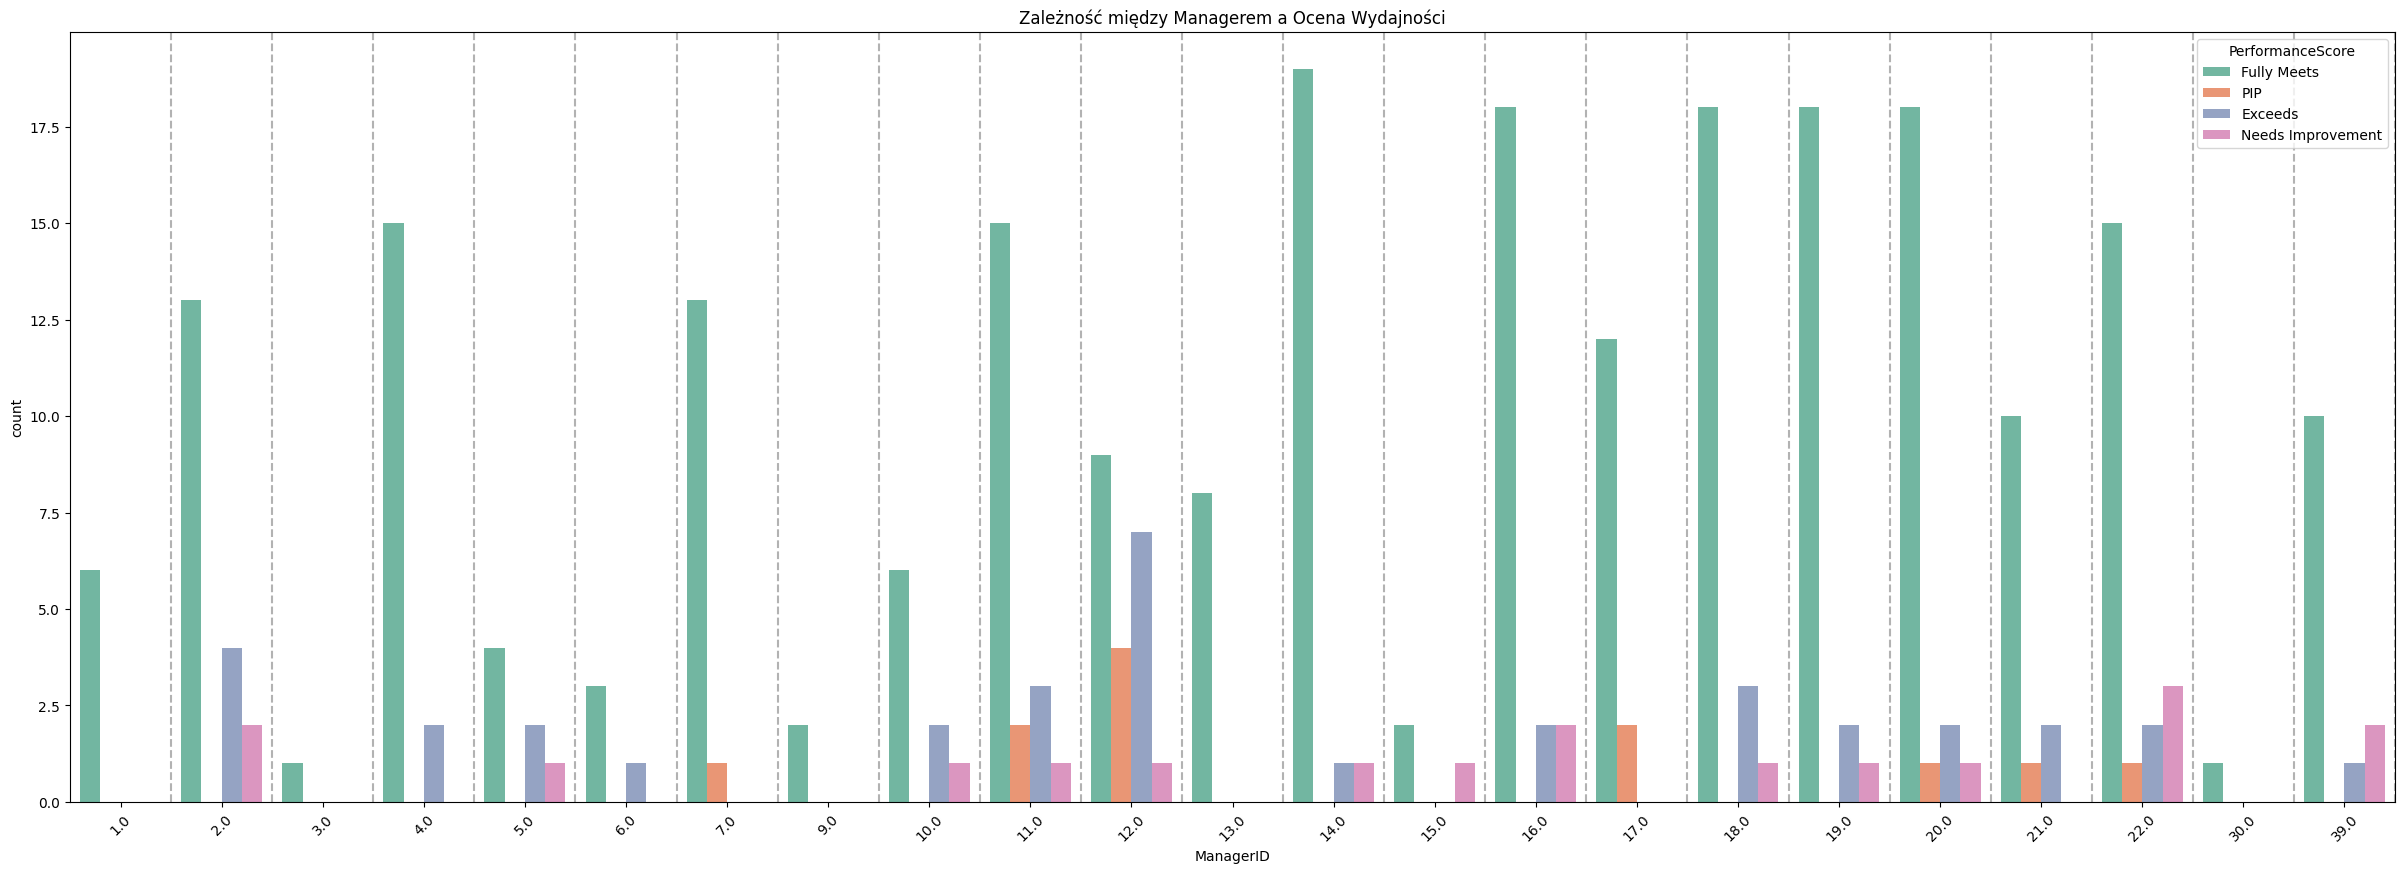

In [4]:
dataset = pd.read_csv('HRDataset.csv')

plt.figure(figsize=(30, 10))
ax = sns.countplot(x='ManagerID', hue='PerformanceScore', data=dataset, palette="Set2")
plt.xticks(rotation=45)
plt.title('Zależność między Managerem a Ocena Wydajności')
for x in ax.get_xticks():
    ax.axvline(x + 0.5, linestyle='--', color='grey', alpha=0.6)
plt.show()

Manager o ID 1.0, 9.0 oraz 30.0 są najbardziej "leniwi" ponieważ ocenili tylko w jednej skali oraz bardzo małą liczbę pracowników. Manager o ID 12.0, 20.0, 22.0 są najbardziej zaangażowani ponieważ wystawili największą ilość ocen różnego rodzaju.

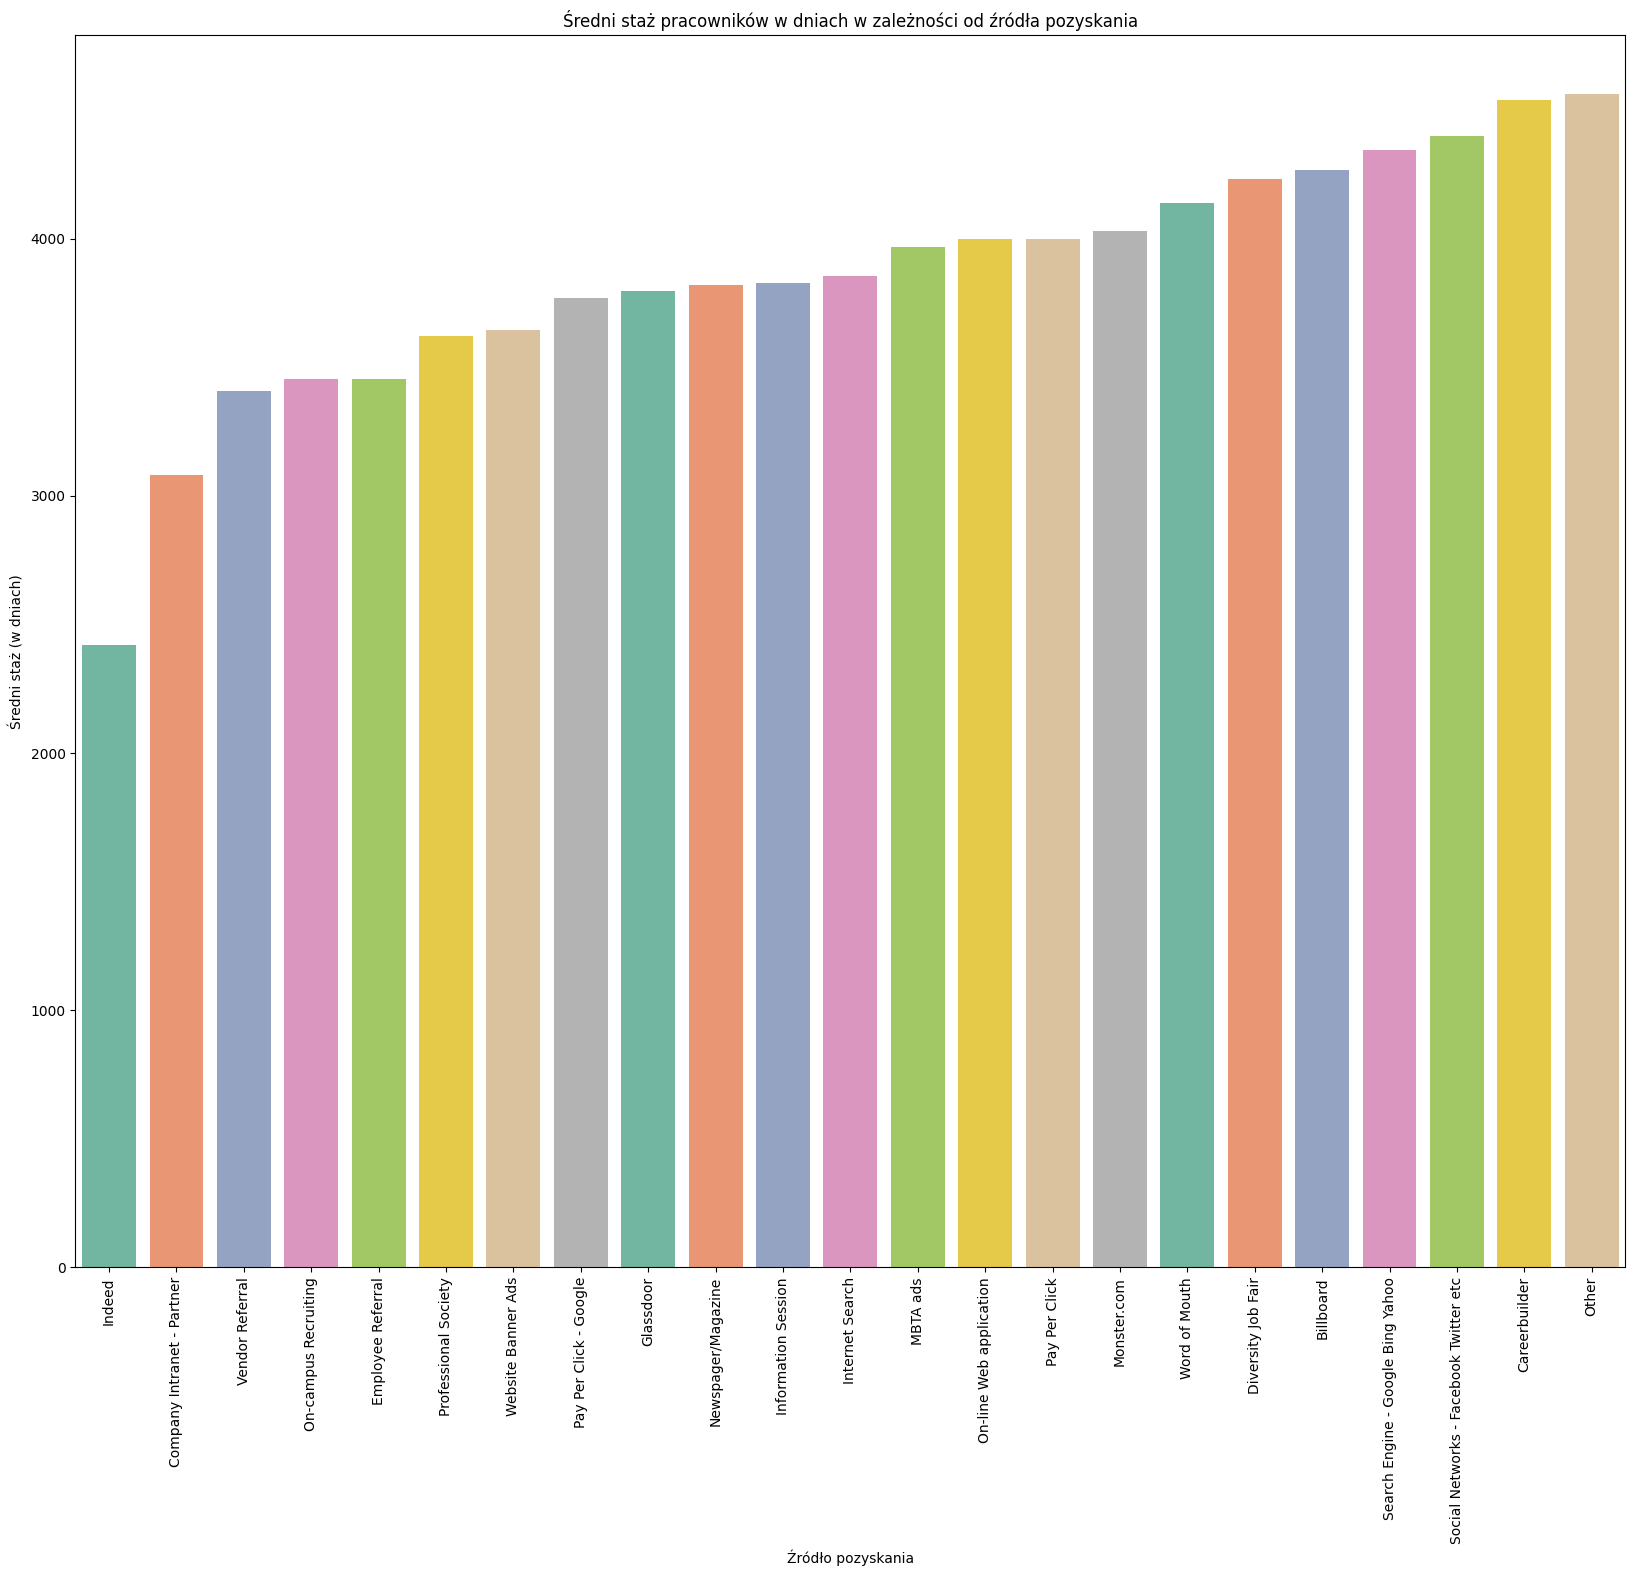

In [5]:
dataset['DateofHire'] = pd.to_datetime(dataset['DateofHire'])

# Obliczenie liczby dni od daty zatrudnienia do obecnej daty
dataset['Days_Tenured'] = (datetime.now() - dataset['DateofHire']).dt.days

# Obliczenie średniej liczby dni dla każdego źródła pozyskania pracownika
average_tenure_by_source = dataset.groupby('RecruitmentSource')['Days_Tenured'].mean().sort_values()

# Wykres średniego stażu pracowników w zależności od źródła pozyskania
plt.figure(figsize=(20, 16))
sns.barplot(x=average_tenure_by_source.index, y=average_tenure_by_source.values, palette="Set2")
plt.xticks(rotation=45)
plt.title('Średni staż pracowników w dniach w zależności od źródła pozyskania')
plt.ylabel('Średni staż (w dniach)')
plt.xlabel('Źródło pozyskania')
plt.xticks(rotation=90) 
plt.show()

Najdłuższy staż pracownika jest ze źródła Careerbuilder oraz social mediów.

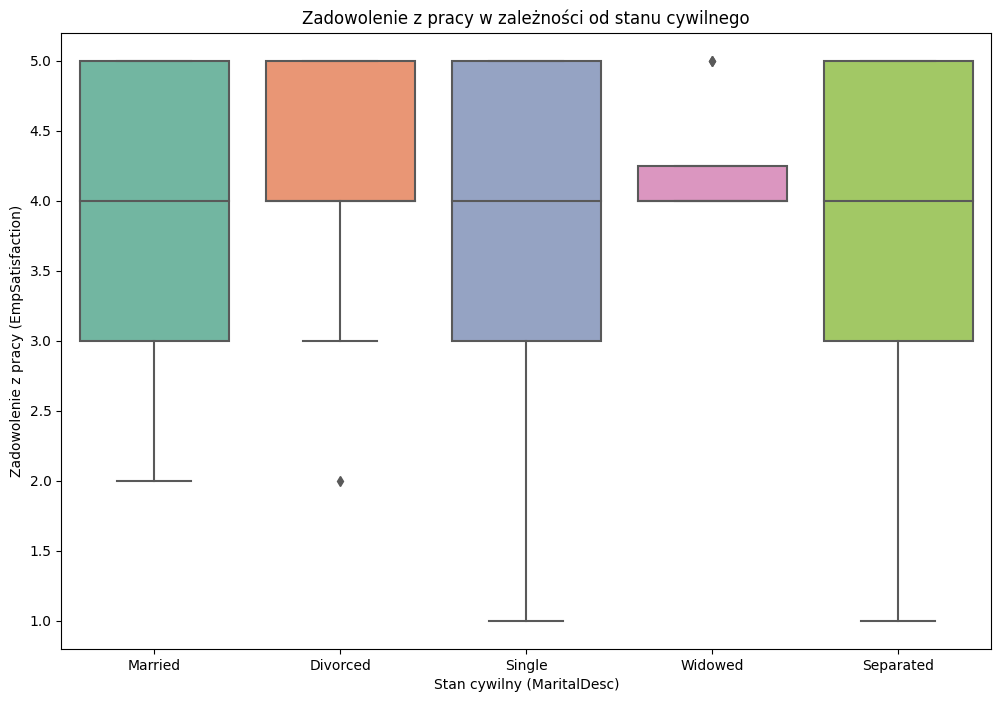

In [6]:
# Stworzenie wykresu pudełkowego
plt.figure(figsize=(12, 8))
sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=dataset, palette="Set2")
plt.title('Zadowolenie z pracy w zależności od stanu cywilnego')
plt.ylabel('Zadowolenie z pracy (EmpSatisfaction)')
plt.xlabel('Stan cywilny (MaritalDesc)')
plt.show()

Najbardziej zadowoloną grupą w pracy są osoby po rozwodzie natomiast najmniej - single.

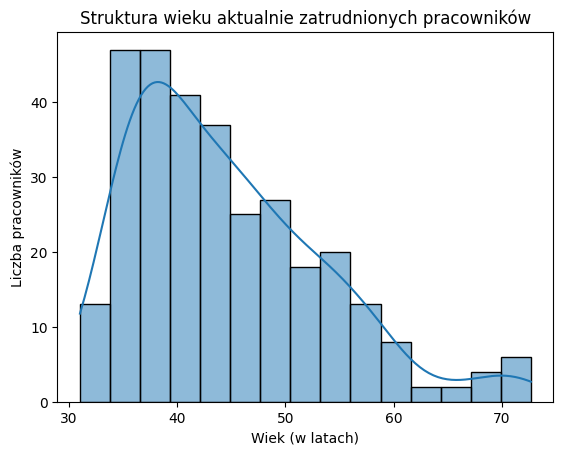

In [15]:
today = datetime.now()
dataset = dataset.dropna(subset=['DOB'])
dataset['DOB'] = pd.to_datetime(dataset['DOB'])
current_year = pd.Timestamp('today').year
dataset['DOB'] = dataset['DOB'].apply(lambda x: x if x.year <= current_year else x.replace(year=x.year-100))
dataset['Age'] = (today - dataset['DOB']).dt.days  # tu obliczamy wiek w dniach
dataset['Years'] = dataset['Age'] / 365.25

# Histogram wieku
sns.histplot(dataset['Years'], bins=15, kde=True)
plt.title('Struktura wieku aktualnie zatrudnionych pracowników')
plt.xlabel('Wiek (w latach)')
plt.ylabel('Liczba pracowników')
plt.show()

Najwięcej osób znajduje się w przedziale 33-39lat (około 100 pracowników). Najstarsza grupa wiekowa to >70 (około 4 pracowników)

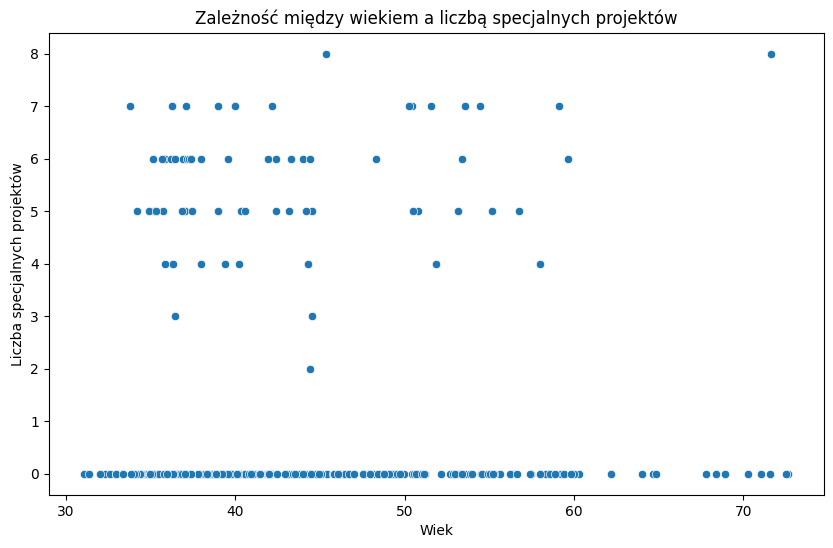

In [18]:
# Utworzenie wykresu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years', y='SpecialProjectsCount', data=dataset)
plt.title("Zależność między wiekiem a liczbą specjalnych projektów")
plt.xlabel("Wiek")
plt.ylabel("Liczba specjalnych projektów")
plt.show()

Osoby po 60r. życia posiadają zdecydowanie mniej projektów od młdoszych osób. Istnieje jeden wyjątek - osoba po 70. ma 8 projektów natomiast pozostałe osoby po 60. - po jednym.